In [16]:
import sae_lens
import torch
import jaxtyping
import random
import datasets
import plotly.colors as pc
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from typing import List, Tuple
from tqdm import tqdm


def obtain_data() -> (
    Tuple[List[sae_lens.SAE], torch.nn.Module, torch.utils.data.Dataset]
):
    """
    load sae, model and dataset
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    layers = 6
    saes = []
    release = "pythia-70m-deduped-res-sm"
    model_name = "pythia-70m-deduped"
    for layer in tqdm(range(layers)):
        sae_id = f"blocks.{layer}.hook_resid_post"
        saes.append(
            sae_lens.SAE.from_pretrained(release=release, sae_id=sae_id, device=device)[
                0
            ]
        )

    model = sae_lens.HookedSAETransformer.from_pretrained(model_name)
    # ds = datasets.load_dataset("Salesforce/wikitext", "wikitext-2-raw-v1")["train"]

    return saes, model, _


saes, model, ds = obtain_data()

100%|██████████| 6/6 [00:01<00:00,  3.49it/s]


Loaded pretrained model pythia-70m-deduped into HookedTransformer


In [17]:
code_acts = torch.load("../res/acts/BAAI-TACO-pythia70m-res-all6-acts.pt")
math_acts = torch.load("../res/acts/math-pythia70m-res-all6-acts.pt")
wiki_acts = torch.load("../res/acts/wiki-pythia70m-res-all6-acts.pt")

/tmp/ipykernel_1607/16796977.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  code_acts = torch.load("../res/acts/BAAI-TACO-pythia70m-res-all6-acts.pt")
/tmp/ipykernel_16

In [18]:
model.unembed.W_U.shape

torch.Size([512, 50304])

In [19]:
print(model.embed.W_E.T - model.unembed.W_U)

tensor([[ 1.6028,  1.8504, -0.5973,  ...,  1.8503,  1.8502,  1.8502],
        [ 1.1824,  1.2078,  0.2473,  ...,  1.2079,  1.2079,  1.2079],
        [ 1.1087,  1.3345, -0.3074,  ...,  1.3345,  1.3346,  1.3346],
        ...,
        [ 1.1905,  1.3593, -0.8089,  ...,  1.3592,  1.3593,  1.3593],
        [ 1.3573,  1.4683, -0.4132,  ...,  1.4684,  1.4686,  1.4684],
        [ 1.3661,  1.5842,  0.0922,  ...,  1.5845,  1.5848,  1.5844]],
       device='cuda:0', grad_fn=<SubBackward0>)


In [20]:
print("code_acts", code_acts.shape)
print("math_acts", math_acts.shape)
print("wiki_acts", wiki_acts.shape)

code_acts torch.Size([6, 32768])
math_acts torch.Size([7, 32768])
wiki_acts torch.Size([7, 32768])


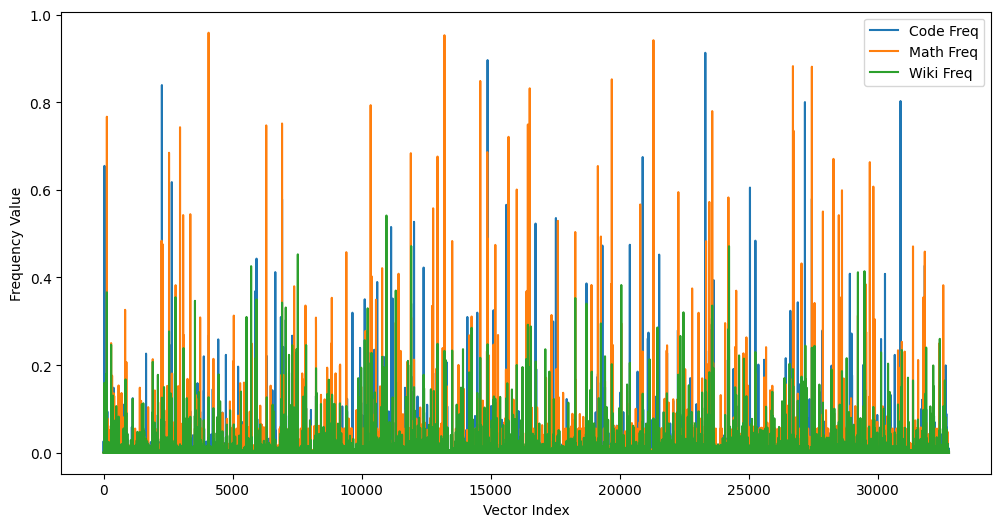

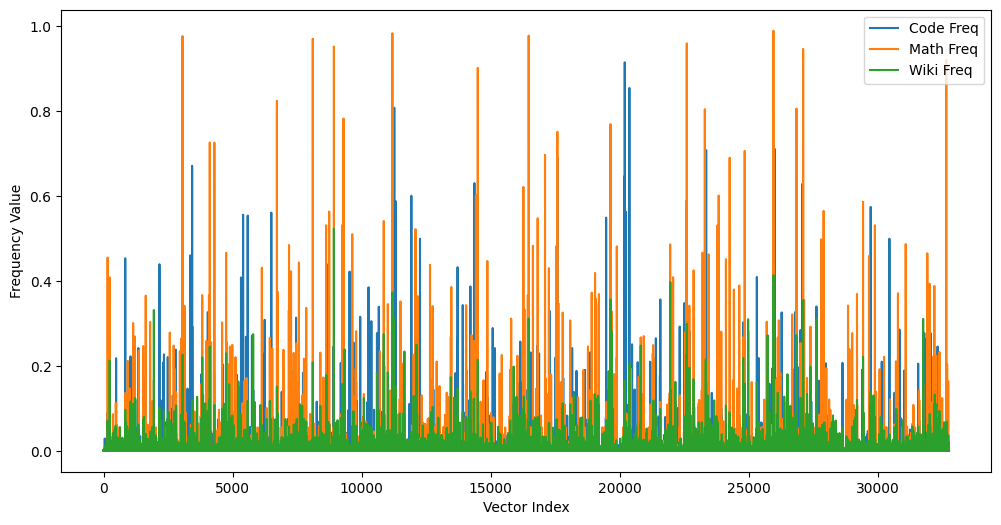

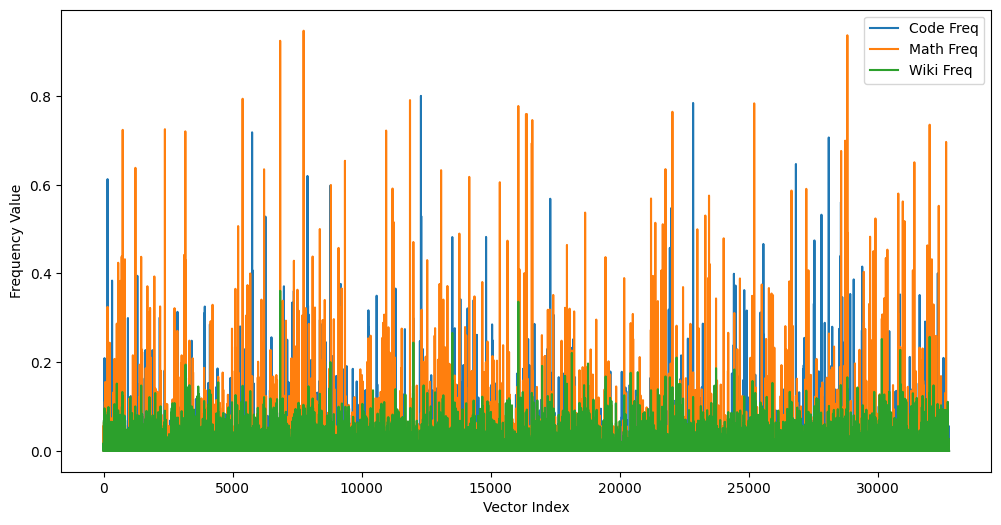

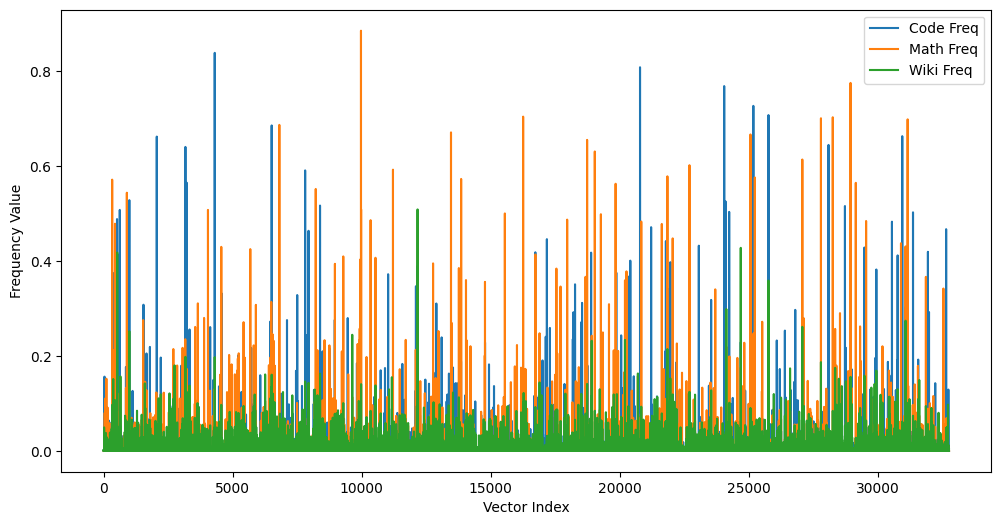

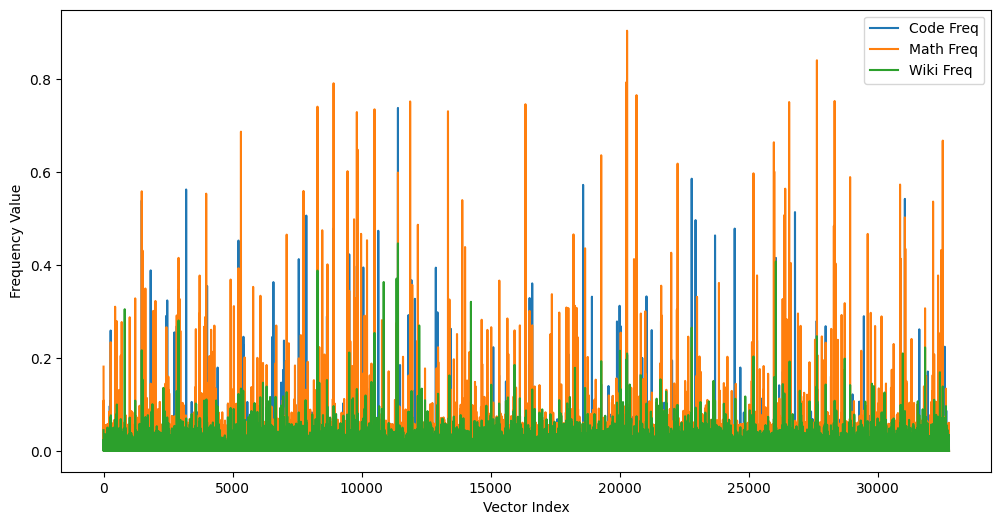

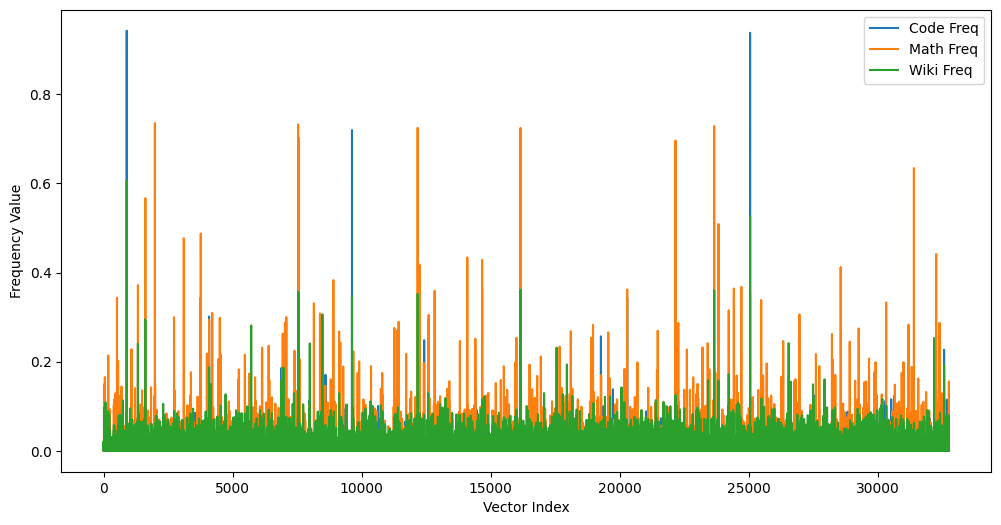

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

# Convert tensors to numpy arrays for plotting
code_acts_np = code_acts.cpu().numpy()
math_acts_np = math_acts.cpu().numpy()
wiki_acts_np = wiki_acts.cpu().numpy()

# Plot the acts
for layer in range(6):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=code_acts_np[layer], label="Code Freq")
    sns.lineplot(data=math_acts_np[layer + 1], label="Math Freq")
    sns.lineplot(data=wiki_acts_np[layer + 1], label="Wiki Freq")

    plt.xlabel("Vector Index")
    plt.ylabel("Frequency Value")
    plt.legend()
    plt.savefig(f"../res/freq/acts_layer_{layer+1}.pdf")
    plt.show()

In [22]:
# import seaborn as sns

# import matplotlib.pyplot as plt
# code_acts = torch.load("../res/acts/BAAI-TACO-pythia70m-res-all6-acts.pt")
# math_acts = torch.load("../res/acts/math-pythia70m-res-all6-acts.pt")
# wiki_acts = torch.load("../res/acts/wiki-pythia70m-res-all6-acts.pt")
# for idx in range(6):
#     code_nonzero_shape = code_acts[idx].nonzero().shape
#     wiki_nonzero_shape = wiki_acts[idx+1].nonzero().shape
#     math_nonzero_shape = math_acts[idx+1].nonzero().shape
#     print(f"Layer {idx+1} Code Nonzero Shape: {code_nonzero_shape}")
#     print(f"Layer {idx+1} Wiki Nonzero Shape: {wiki_nonzero_shape}")
#     print(f"Layer {idx+1} Math Nonzero Shape: {math_nonzero_shape}")

In [23]:
# for layer in range(6):
#     top_index_code = torch.topk(code_acts[layer], 300).indices
#     top_index_math = torch.topk(math_acts[layer+1], 300).indices
#     top_index_wiki = torch.topk(wiki_acts[layer+1], 300).indices
#     top_index = torch.cat((top_index_code, top_index_math, top_index_wiki), dim=0)
#     # top_index = top_index.unique().cpu().numpy()
#     top_index = top_index.cpu().numpy()
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(data=code_acts_np[layer][top_index], label='Code Freq')
#     sns.lineplot(data=math_acts_np[layer+1][top_index], label='Math Freq')
#     sns.lineplot(data=wiki_acts_np[layer+1][top_index], label='Wiki Freq')

#     plt.xlabel('Vector Index')
#     plt.ylabel('Mean Frequency Value')
#     plt.legend()
#     plt.show()
#     # plt.savefig(f"../res/freq/acts_layer_{layer+1}.pdf")

In [24]:
# for layer in range(6):
#     top_index_code = torch.topk(code_acts[layer], 300).indices
#     top_index_math = torch.topk(math_acts[layer+1], 300).indices
#     top_index_wiki = torch.topk(wiki_acts[layer+1], 300).indices
#     top_index = torch.cat((top_index_code, top_index_math, top_index_wiki), dim=0)
#     top_index = top_index.unique().cpu().numpy()
#     # top_index = top_index.cpu().numpy()
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(data=code_acts_np[layer][top_index], label='Code Freq')
#     sns.lineplot(data=math_acts_np[layer+1][top_index], label='Math Freq')
#     sns.lineplot(data=wiki_acts_np[layer+1][top_index], label='Wiki Freq')

#     plt.xlabel('Vector Index')
#     plt.ylabel('Mean Frequency Value')
#     plt.legend()
#     plt.show()
#     # plt.savefig(f"../res/freq/acts_layer_{layer+1}.pdf")

torch.Size([662])


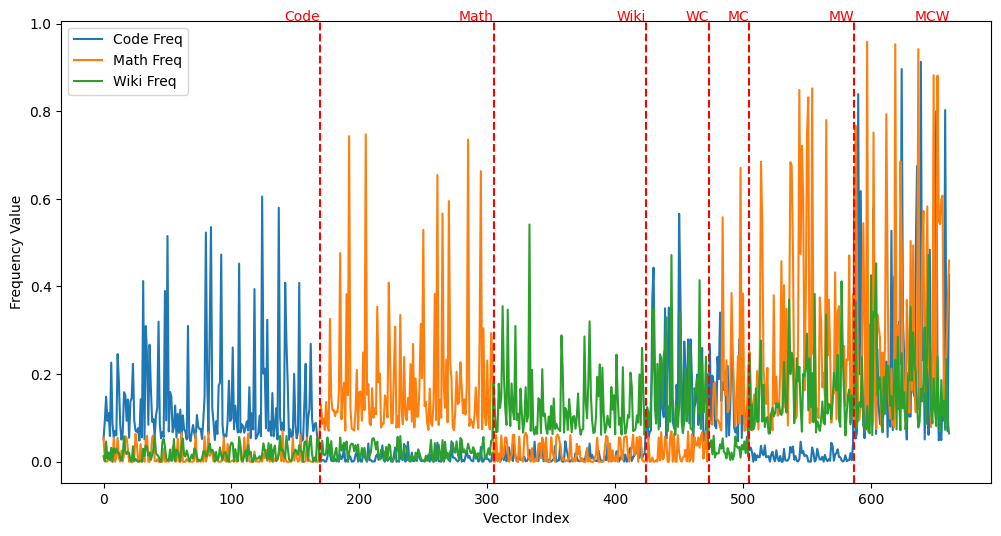

torch.Size([697])


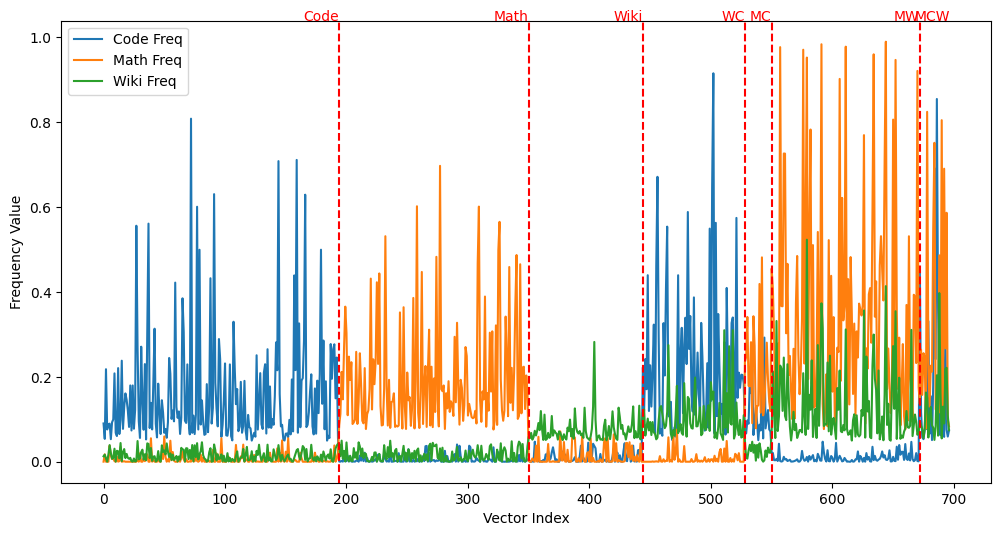

torch.Size([788])


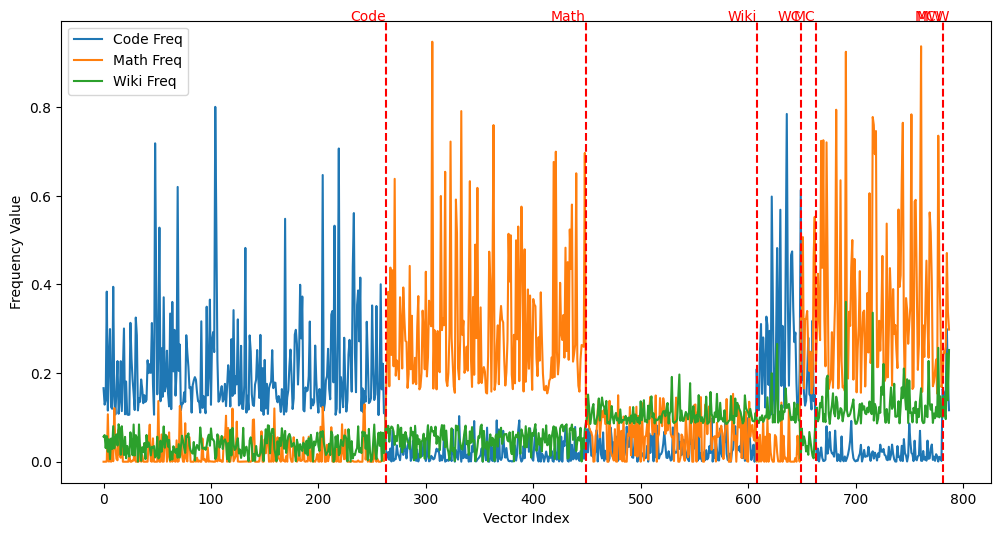

torch.Size([740])


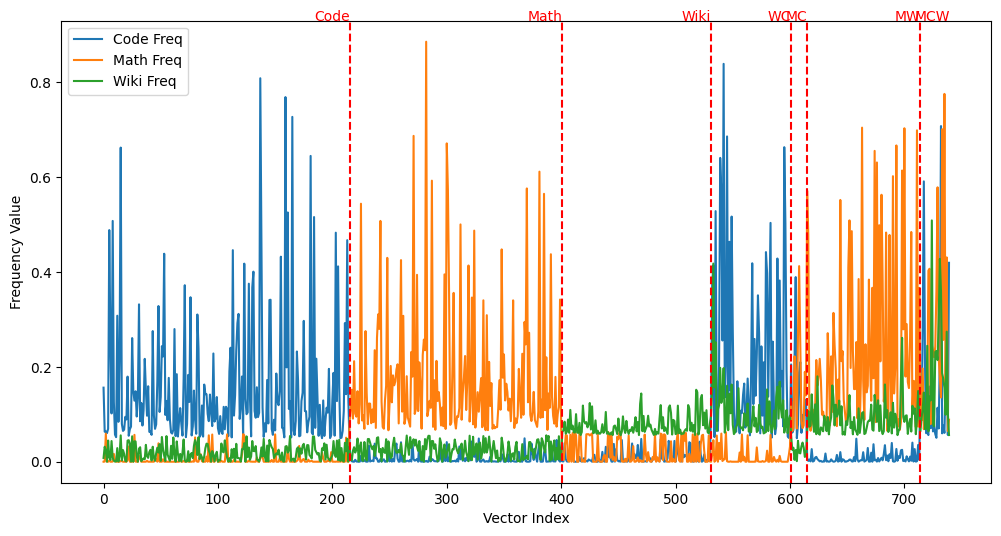

torch.Size([664])


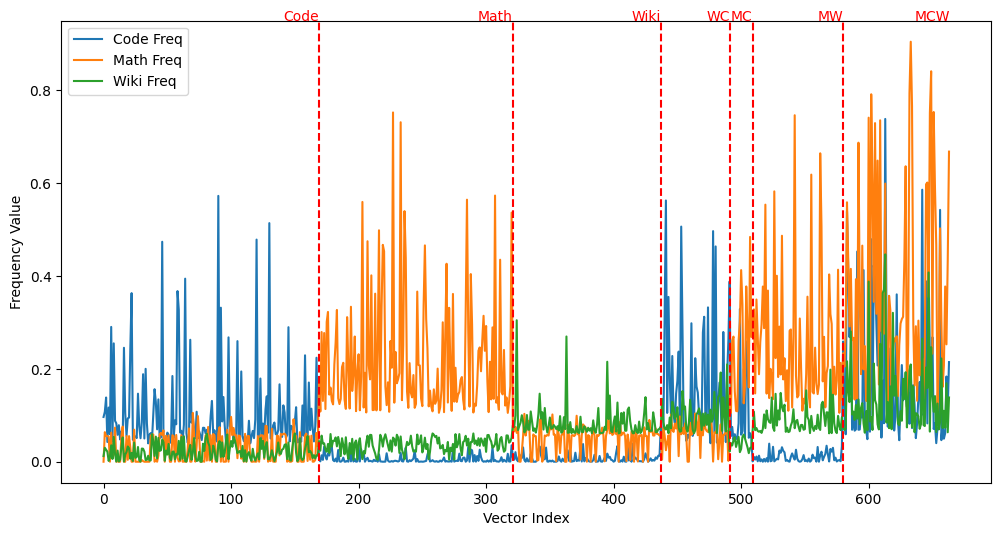

torch.Size([817])


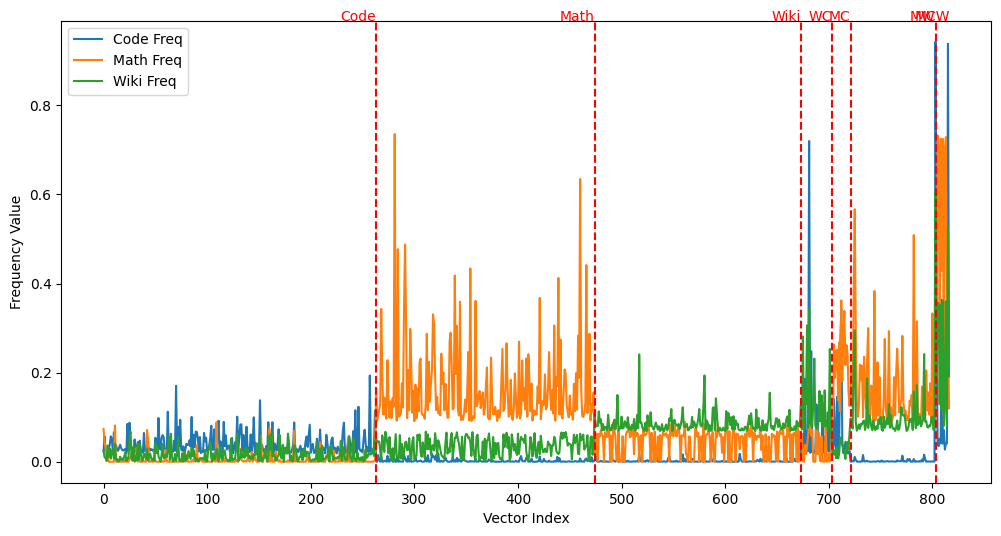

In [25]:
for layer in range(6):
    top_index_code = torch.topk(code_acts[layer], 325).indices
    top_index_math = torch.topk(math_acts[layer + 1], 325).indices
    top_index_wiki = torch.topk(wiki_acts[layer + 1], 325).indices
    top_index_mc = np.intersect1d(
        top_index_code.cpu().numpy(), top_index_math.cpu().numpy()
    )
    top_index_mw = np.intersect1d(
        top_index_math.cpu().numpy(), top_index_wiki.cpu().numpy()
    )
    top_index_cw = np.intersect1d(
        top_index_code.cpu().numpy(), top_index_wiki.cpu().numpy()
    )
    top_index = np.intersect1d(top_index_mc, top_index_mw)
    top_index_wiki = np.setdiff1d(
        top_index_wiki.cpu().numpy(), np.union1d(top_index_cw, top_index_mw)
    )
    top_index_math = np.setdiff1d(
        top_index_math.cpu().numpy(), np.union1d(top_index_mc, top_index_mw)
    )
    top_index_code = np.setdiff1d(
        top_index_code.cpu().numpy(), np.union1d(top_index_mc, top_index_cw)
    )
    top_index_mc = np.setdiff1d(top_index_mc, top_index)
    top_index_mw = np.setdiff1d(top_index_mw, top_index)
    top_index_cw = np.setdiff1d(top_index_cw, top_index)
    torch_top_index = torch.cat(
        (
            torch.tensor(top_index_code, device=code_acts.device),
            torch.tensor(top_index_math, device=code_acts.device),
            torch.tensor(top_index_wiki, device=code_acts.device),
            torch.tensor(top_index_cw, device=code_acts.device),
            torch.tensor(top_index_mc, device=code_acts.device),
            torch.tensor(top_index_mw, device=code_acts.device),
            torch.tensor(top_index, device=code_acts.device),
        ),
        dim=0,
    )
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=code_acts_np[layer][torch_top_index.cpu().numpy()], label="Code Freq"
    )
    sns.lineplot(
        data=math_acts_np[layer + 1][torch_top_index.cpu().numpy()], label="Math Freq"
    )
    sns.lineplot(
        data=wiki_acts_np[layer + 1][torch_top_index.cpu().numpy()], label="Wiki Freq"
    )
    print(torch_top_index.shape)
    boundary_text = ["Code", "Math", "Wiki", "WC", "MC", "MW", "MCW"]
    idx = 0
    for boundary in [
        top_index_code.shape[0],
        top_index_code.shape[0] + top_index_math.shape[0],
        top_index_code.shape[0] + top_index_math.shape[0] + top_index_wiki.shape[0],
        top_index_code.shape[0]
        + top_index_math.shape[0]
        + top_index_wiki.shape[0]
        + top_index_cw.shape[0],
        top_index_code.shape[0]
        + top_index_math.shape[0]
        + top_index_wiki.shape[0]
        + top_index_cw.shape[0]
        + top_index_mc.shape[0],
        top_index_code.shape[0]
        + top_index_math.shape[0]
        + top_index_wiki.shape[0]
        + top_index_cw.shape[0]
        + top_index_mc.shape[0]
        + top_index_mw.shape[0],
    ]:
        plt.axvline(x=boundary, color="r", linestyle="--")
        plt.text(boundary, plt.ylim()[1], boundary_text[idx], color="r", ha="right")
        idx += 1
    plt.text(
        torch_top_index.shape[0],
        plt.ylim()[1],
        boundary_text[idx],
        color="r",
        ha="right",
    )
    plt.xlabel("Vector Index")
    plt.ylabel("Frequency Value")
    plt.legend()

    plt.savefig(f"../res/freq/top_acts_layer_{layer+1}.pdf")
    plt.show()

In [26]:
# top_num = 1000
# for layer in range(6):
#     top_index_code = torch.topk(code_acts[layer], top_num).indices
#     top_index_math = torch.topk(math_acts[layer+1], top_num).indices
#     top_index_wiki = torch.topk(wiki_acts[layer+1], top_num).indices
#     top_index_mc = np.intersect1d(top_index_code.cpu().numpy(), top_index_math.cpu().numpy())
#     top_index_mw = np.intersect1d(top_index_math.cpu().numpy(), top_index_wiki.cpu().numpy())
#     top_index_cw = np.intersect1d(top_index_code.cpu().numpy(), top_index_wiki.cpu().numpy())
#     top_index = np.intersect1d(top_index_mc, top_index_mw)
#     torch_top_index = torch.cat((
#         top_index_code,
#         top_index_math,
#         top_index_wiki,
#         torch.tensor(top_index_cw, device=top_index_code.device),
#         torch.tensor(top_index_mc, device=top_index_code.device),
#         torch.tensor(top_index_mw, device=top_index_code.device),
#         torch.tensor(top_index, device=top_index_code.device)
#     ), dim=0)
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(data=code_acts_np[layer][torch_top_index.cpu().numpy()], label='Code Freq')
#     sns.lineplot(data=math_acts_np[layer+1][torch_top_index.cpu().numpy()], label='Math Freq')
#     sns.lineplot(data=wiki_acts_np[layer+1][torch_top_index.cpu().numpy()], label='Wiki Freq')
#     boundary_text = ['Code', 'Math', 'Wiki', 'WC', 'MC', 'MW', 'MCW']
#     idx = 0
#     for boundary in [top_index_code.shape[0],
#                      top_index_code.shape[0] + top_index_math.shape[0],
#                      top_index_code.shape[0] + top_index_math.shape[0] + top_index_wiki.shape[0],
#                      top_index_code.shape[0] + top_index_math.shape[0] + top_index_wiki.shape[0] + top_index_cw.shape[0],
#                      top_index_code.shape[0] + top_index_math.shape[0] + top_index_wiki.shape[0] + top_index_cw.shape[0] + top_index_mc.shape[0],
#                      top_index_code.shape[0] + top_index_math.shape[0] + top_index_wiki.shape[0] + top_index_cw.shape[0] + top_index_mc.shape[0] + top_index_mw.shape[0]]:
#         plt.axvline(x=boundary, color='r', linestyle='--')
#         plt.text(boundary, plt.ylim()[1], boundary_text[idx], color='r', ha='right')
#         idx += 1
#     plt.text(torch_top_index.shape[0], plt.ylim()[1], boundary_text[idx], color='r', ha='right')
#     plt.xlabel('Vector Index')
#     plt.ylabel('Mean Frequency Value')
#     plt.legend()
#     plt.show()

#     # plt.savefig(f"../res/freq/acts_layer_{layer+1}.pdf")